# Introducción a Python y NLP

En este *notebook*, desarrollo los ejercicios del libro *Natural Languaje Processing with Python*. Para esto, hay que importar el paquete principal **nltk** y sus dataframes asociados.

In [141]:
%%capture
import nltk 
nltk.download("book")
from nltk.book import *

In [142]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Análisis básicos en NLP

Como es clásico, la búsqueda de concordancia nos permite explorar superficialmente de qué va un texto. Las concordancias pueden mostrarse a través del método `.concordance("word")`:

In [143]:
text2.concordance("love")

Displaying 25 of 77 matches:
priety of going , and her own tender love for all her three children determine
es ." " I believe you are right , my love ; it will be better that there shoul
 . It implies everything amiable . I love him already ." " I think you will li
sentiment of approbation inferior to love ." " You may esteem him ." " I have 
n what it was to separate esteem and love ." Mrs . Dashwood now took pains to 
oner did she perceive any symptom of love in his behaviour to Elinor , than sh
 how shall we do without her ?" " My love , it will be scarcely a separation .
ise . Edward is very amiable , and I love him tenderly . But yet -- he is not 
ll never see a man whom I can really love . I require so much ! He must have a
ry possible charm ." " Remember , my love , that you are not seventeen . It is
f I do not now . When you tell me to love him as a brother , I shall no more s
hat Colonel Brandon was very much in love with Marianne Dashwood . She rather 
e were ever animated en

Expresiones que ocupan un contexto similar (como "amor" en el caso anterior) pueden evidenciarse con el método `.similar("word")`. En el ejemplo siguiente, vemos palabras que ocupan regularmente el mismo contexto que *amor* en Orgullo y Prejuicio:

In [144]:
text2.similar("love")

affection sister heart mother time see town life it dear elinor
marianne me word family her him do regard head


Si hacemos lo mismo con Moby Dick, vemos que el "love" ocupa las mismas posiciones que *mar, vida, muerte, naturaleza, hombre, barco*, mientras que en Orgullo y Prejuicio esto se reserva en el *afecto*, el pueblo, la familia. Esto es interesante en tanto es un reflejo del efecto del **campo** en la combinatoria:

In [145]:
text1.similar("love")

sea man it ship by him hand them whale view ships land me life death
water way head nature fear


Un clásico también son los *dispersion plots*. Con este, se puede visualizar la instanciación de lexemas en un texto completo, tal como en los discursos presidenciales estadounidenses y en Orgullo y Prejuicio:

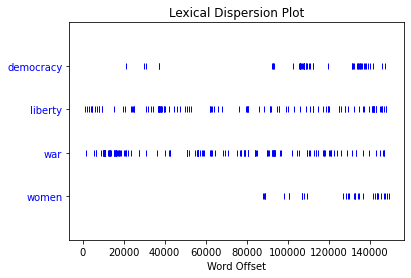

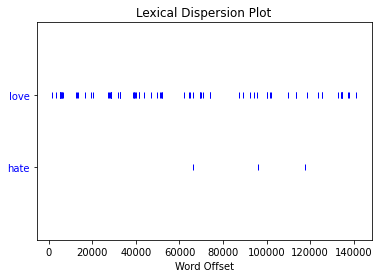

In [146]:
text4.dispersion_plot(["democracy", "liberty", "war", "women"])
text2.dispersion_plot(["love", "hate"])

Otro manejo básico de los textos es conocer su cantidad de **tokens** (casos) y **types** (tipos), así como las medidas de **riqueza léxica**. Así, mientras los tokens representan la cantidad de ocurrencias de un ítem, los types representan el valor único de cada ítem independiente de su número de aparición. 



In [147]:
print("Orgullo y Prejuicio posee un total de ", len(text2), "tokens")
print("Orgullo y Prejuicio posee un total de ", len(set(text2)), "types")

Orgullo y Prejuicio posee un total de  141576 tokens
Orgullo y Prejuicio posee un total de  6833 types


A partir de estas medidas se obtiene la diversidad léxica, tal que
$ riqueza = \frac{token}{type}$. Entonces, a partir de esta ecuación, podemos decir que :

In [148]:
print("Cada palabra en Orgullo y Prejuicio se ocupa en promedio unas", len(text2)/len(set(text2)))

Cada palabra en Orgullo y Prejuicio se ocupa en promedio unas 20.719449729255086


Medidas como la diversidad léxica y el cálculo de porcentajes pueden operacionalizarse rápidamente en **funciones** con el operador `def`:

In [149]:
def diversidad_lexica(text):
  return len(text)/len(set(text))

def porcentaje(count, total):
  return 100 * count/total

Con estas funciones ya definidas, podemos ocuparlas con cualquier texto. 

In [150]:
print("Moby Dick posee una diversidad léxica de", diversidad_lexica(text1))

Moby Dick posee una diversidad léxica de 13.502044830977896


In [151]:
print("La palabra `love` representa un", porcentaje(text1.count("love"), len(text1)), "de Orgullo y Prejuicio")

La palabra `love` representa un 0.009201783612390201 de Orgullo y Prejuicio


Desde un punto de vista computacional, los textos son una lista de palabras y símbolos de puntuación. Con esta visión, un token posee una posición conocida como **index** (en Python los index parten en 0, en R parten en 1). El index puede ser recuperado desde una palabra o con un número:

In [152]:
print("La palabra `love` se encuentra en el index", text2.index("love"))
print(text2[1447])

La palabra `love` se encuentra en el index 1447
love


## Frecuencias

Estadísticamente, también podemos observar la distribución de frecuencia de los diferentes textos. Para esto, ocupamos la función `FreqDist()`:

In [153]:
fdist2 = FreqDist(text2)
vocabulario2 = fdist2.keys()
print("La palabra `love` posee una frecuencia de", fdist2["love"])

La palabra `love` posee una frecuencia de 77


Podemos graficar esta distribución con el método `plot(n, cumulative)` sobre el objeto `fdist2`. No obstante, muchas de las palabras que recupera son poco informativas, como determinantes o puntuaciones:



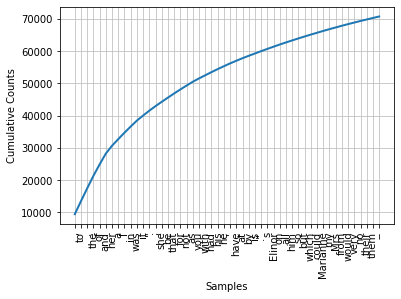

In [154]:
fdist2.plot(50, cumulative = True)

Por medio de un condicional como `[w for w in V if len(w) > 4]` logramos que se seleccionen solo palabras con una extensión mayor a 4 caracteres. 

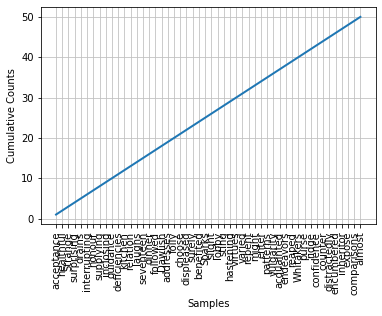

In [155]:
V = set(text2)
long_words = [w for w in V if len(w) > 4]
fdist_long = FreqDist(long_words)
fdist_long.plot(50, cumulative = True)

## Colocaciones y bigramas

Las colocaciones son conjuntos de palabras que suelen ocurrir juntas (como *vino tinto*). La observaciones de estos implican la revisión de bigramas. Así, toda colocación es un n-grama, pero no todo n-grama es una colocación. El método `.collocations()` expone estos bigramas:

In [156]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


Lo interesante de las colocaciones es que muestran patrones léxicogramaticales propios de cada género o tipo de texto. En el caso anterior de Orgullo y Prejuicio, las colocaciones suelen ser nombres (e.g. *colonel Brandon*), periodos de tiempo (e.g. *every day*) y lugares (e.g. *Berkeley Street*).

In [157]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


Con estos recursos, entonces, es posible construir condicionales en una única línea de código que recupere los ítemes que sean `True` según condicionales:

In [158]:
sorted([w for w in set(text7) if '-' in w and 'index' in w])
sorted([t for t in set(text2) if 'cie' in t or 'cei' in t])
sorted([amor for amor in set(text2) if 'love' in amor])
sorted([año for año in set(text2) if año.isdigit() and len(año) >= 4])
len(set([word.lower() for word in text1 if word.isalpha()]))

16948

Además, Python permite hacer un `loop` en el texto:


In [159]:
tricky = sorted([w for w in set(text2) if 'cie' in w or 'cei' in w])
for word in tricky:
  print(word)

ancient
ceiling
conceit
conceited
conceive
conscience
conscientious
conscientiously
deceitful
deceive
deceived
deceiving
deficiencies
deficiency
deficient
delicacies
excellencies
fancied
insufficiency
insufficient
legacies
perceive
perceived
perceiving
prescience
prophecies
receipt
receive
received
receiving
society
species
sufficient
sufficiently
undeceive
undeceiving


## Ejercicios

1. Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples? 

**R::** Pareciera que las mujeres siempre están presentes en la obra, mientras que los hombres van intercalando su presencia. Es decir, cuando Edward es mencionado, Willoughby no lo es. En otras palabras, las mujeres articulan la historia y el diálogo. En cuanto a las parejas, creo que Edward se queda con Elinor, en tanto ambos dialogan mucho al final. Por su parte, Marianne y Willoughby no parecen seguir juntos.

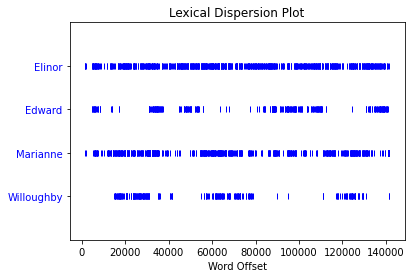

In [160]:
text2.dispersion_plot(["Elinor", "Edward", "Marianne", "Willoughby"])

2. Find the collocations in text5.

In [161]:
text5.collocations()

wanna chat; PART JOIN; MODE #14-19teens; JOIN PART; PART PART;
cute.-ass MP3; MP3 player; JOIN JOIN; times .. .; ACTION watches; guys
wanna; song lasts; last night; ACTION sits; -...)...- S.M.R.; Lime
Player; Player 12%; dont know; lez gurls; long time


3. Use `text9.index()` to find the index of the word sunset. You’ll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

In [162]:
print("El item `sunset` se encuentra en el index", text9.index("sunset"))
text9[621:644]

El item `sunset` se encuentra en el index 629


['THE',
 'suburb',
 'of',
 'Saffron',
 'Park',
 'lay',
 'on',
 'the',
 'sunset',
 'side',
 'of',
 'London',
 ',',
 'as',
 'red',
 'and',
 'ragged',
 'as',
 'a',
 'cloud',
 'of',
 'sunset',
 '.']

4. Using list addition, and the set and sorted operations, compute the vocabulary of the sentences sent1 ... sent8.

In [163]:
sent_total = sent1 + sent2 + sent3 + sent4 + sent5 + sent6 + sent7 + sent8
print("El total de oraciones 1...8 posee un total de tipos de", len(sorted(set(sent_total))))

El total de oraciones 1...8 posee un total de tipos de 75


5. What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?

In [164]:
len(sorted(set([w.lower() for w in text1]))) # 17231
len(sorted([w.lower() for w in set(text1)])) # 19317

19317

6. Write the slice expression that extracts the last two words of text2.

In [165]:
text2[-2:]

['THE', 'END']

7. Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of fre- quency.

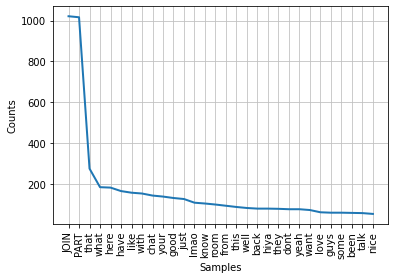

In [166]:
four_letter = [f for f in text5 if len(f) == 4 and f.isalpha()]
freqfour = FreqDist(four_letter)
freqfour.plot(30, cumulative = False)

8. Review the discussion of looping with conditions in Section 1.4. Use a combination of for and if statements to loop over the words of the movie script for Monty Python and the Holy Grail (text6) and print all the uppercase words, one per line.

In [167]:
for up in set(text6):
  if up.isupper():
    print(up)

WIFE
BROTHER
MINSTREL
CARTOON
ARTHUR
LOVELY
VOICE
DIRECTOR
HERBERT
WOMAN
THE
NI
OLD
HISTORIAN
GUEST
TIM
CROWD
BORS
OTHER
SUN
GUESTS
LEFT
PIGLET
ALL
CAMERAMAN
I
FATHER
SCENE
BLACK
KNIGHTS
INSPECTOR
CHARACTER
W
Y
MIDGET
GALAHAD
AMAZING
FRENCH
ROBIN
OF
KNIGHT
B
HEADS
BRIDGEKEEPER
SHRUBBER
RANDOM
PARTY
GREEN
CHARACTERS
DEAD
A
CONCORDE
PRISONER
BEDEVERE
KING
PRINCE
CRONE
MIDDLE
DINGO
HEAD
WITCH
MAYNARD
SIR
O
CRASH
SOLDIER
DENNIS
GOD
CRAPPER
SENTRY
ZOOT
CUSTOMER
MASTER
MONKS
ENCHANTER
ARMY
GUARD
VILLAGER
C
MAN
ROGER
OFFICER
RIGHT
N
PRINCESS
PATSY
S
GIRLS
GUARDS
BRIDE
WINSTON
STUNNER
LUCKY
NARRATOR
PERSON
VILLAGERS
ANIMATOR
SECOND
U
LAUNCELOT
CART


9. Write expressions for finding all words in text6 that meet the following conditions:


1.   Ending in ize
2.   Containing the letter z
3.   Containing the sequence of letters pt
4.   All lowercase letters except for an initial capital (i.e., titlecase)



In [168]:
%%capture
z = sorted([w for w in set(text6) if 'z' in w])
ize = sorted([w for w in set(text6) if w.endswith("ize")])
pt = sorted([w for w in set(text6) if 'pt' in w])
title = sorted([w for w in set(text6) if w.istitle()])

8. **Define sent to be the list of words ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']. Now write code to perform the following tasks:**


1. Print all words beginning with sh.
2. Print all words longer than four characters

In [169]:
sent =  ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']
sh = sorted([w for w in sent if w.startswith("sh")])
longer_than_four = sorted([f for f in sent if len(f) > 4])
print("Las palabras que empiezan con `sh` son", sh)
print("Las palabras mayores a cuatro letras son", longer_than_four)

Las palabras que empiezan con `sh` son ['she', 'shells', 'shore']
Las palabras mayores a cuatro letras son ['sells', 'shells', 'shore']


9.**What does the following Python code do? sum([len(w) for w in text1]) Can you use it to work out the average word length of a text?**

Este código suma el largo total de las palabras en el text1

In [170]:
mean_word = sum([len(w) for w in text1])/len(text1)
print("El texto 1 posee un largo medio de palabra de", round(mean_word, 1))

El texto 1 posee un largo medio de palabra de 3.8


10. **Define a function called vocab_size(text) that has a single parameter for the text, and which returns the vocabulary size of the text.**

In [171]:
def vocab_size(text):
  types = len(set(text))
  token = len(text)
  richness = token/types
  return print("El texto posee un tamaño de vocabulario de", token, "tokens y", types, "types", "y una diversidad de", round(richness, 1))

vocab_size(text1)

El texto posee un tamaño de vocabulario de 260819 tokens y 19317 types y una diversidad de 13.5


# Acceder a corpora y recursos léxicos



El paque `nltk` posee múltiples fuentes de corpus. Una de esta son los textos de la Biblioteca Gutemberg, con libros liberados de derechos de autor. Estos pueden ser accedidos libremente. No obstante, suelen ser libros en lengua inglesa.

## Corpora en inglés

In [172]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Para seleccionar uno de estos en específico, el método `corpus` selecciona el corpus en `nltk`. El método `gutemberg` selecciona la librería específica, y `words` tokeniza las palabras del texto seleccionado `(austen-emma.txt)`. Otro método es `import`, que importa todos los textos de `gutenberg`. Otras fuentes de textos son `webtext`, con textos extraidos de internet general a partir de webscrapping, `nps_chat` de la *Naval Postgraduate School*, el corpus `brown` con múltiples géneros (desde ficción pasando por noticias hasta hobbies), `reuters` con textos noticiosos e `inaugural` con los discursos de inicio de gobierno en EEUU.

In [173]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
from nltk.corpus import gutenberg
from nltk.corpus import brown

A partir de esta variedad de corpus, podemos explorar por ejemplo la presencia de adverbios modales en las editoriales de prensa:

In [174]:
editorial_text = brown.words(categories='editorial')
fdist = nltk.FreqDist([w.lower() for w in editorial_text])
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
  print (m + ':', fdist[m])

can: 124
could: 57
may: 79
might: 39
must: 55
will: 235


O contar la cantidad de pronombres interrogativos en el mismo género:

In [175]:
wh = ['when', 'where', 'when', 'what', 'why', 'who']
for w in wh:
  print(w + ':', fdist[w])

when: 123
where: 45
when: 123
what: 113
why: 23
who: 177


Con corpora con datos temporales, es posible visualizar el uso de palabras a través del tiempo. En este caso, el corpus `inaugural` nos permite esto:


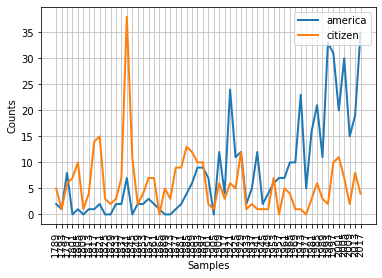

In [176]:
from nltk.corpus import inaugural
inaugural.fileids()

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

cfd.plot()

## Corpora en otras lenguas

Si bien corpora en otras lenguas no son muy comunes, están disponible `cess_esp`, `floresta`, `indian` y `udhr`. Este último es la Declaración  Universal de Derechos Humanos, disponible en más de 300 idiomas. El libro entrega el siguiente código, donde se observa la extensión media de las palabras en diferentes idiomas:

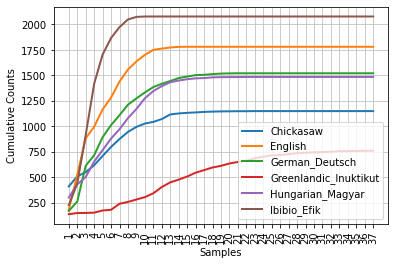

In [177]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik'] 

cfd = nltk.ConditionalFreqDist(
    (lang, len(word)) # condition = language, event = len(word)
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

Así, por ejemplo, podemos ver cuáles son las letras más comunes en las diferentes lenguas, como en este caso del español:

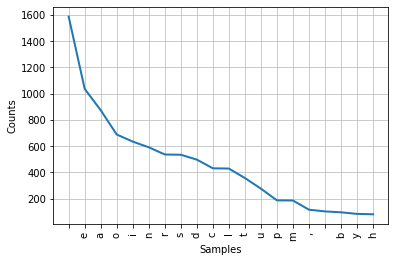

In [178]:
spanish = ['Spanish-Latin1']
raw_text = udhr.raw(spanish)
nltk.FreqDist(raw_text).plot(20)

## Distribución de Frecuencia Condicional

Esta distribución de frecuencia permite realizar el conteo a partir de diferentes niveles de un factor (e.g. hablantes, géneros, estudiantes, etc.). Cada uno de los niveles representa una condición sobre la cual se realiza el conteo.

In [179]:
from nltk.corpus import udhr # importa el corpus udhr
languages = ['German_Deutsch', 'English'] # selecciona los idiomas de interes 

cfd = nltk.ConditionalFreqDist(
    (lang, len(word)) # condition = lang, event = len(word)
    for lang in languages # para cada lenguaje en los lenguaje seleccionados 
    for word in udhr.words(lang + '-Latin1')) # y para cada palabra en entos lenguajes, calcula frecuencia

cfd.tabulate(conditions=['English', #tabula para ambos lenguaje
                         'German_Deutsch'],
             samples = range(10), cumulative = True) # agrupa según el largo de sus palabras la cantidad

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


Your Turn: Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called days containing alistofdaysoftheweek,i.e.,['Monday', ...].Nowtabulatethecounts for these words using cfd.tabulate(samples=days). Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: conditions=['Monday', ...].

In [180]:
from nltk.corpus import brown
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

genre_word = [(genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)]


cfd = nltk.ConditionalFreqDist(genre_word)
cfd.tabulate(samples = days)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


Esta distribución podemos graficarla:

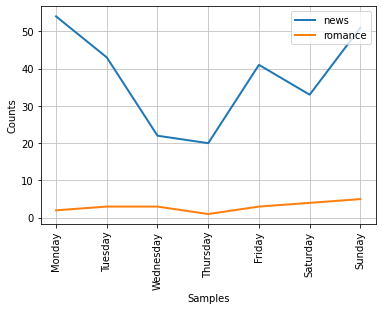

In [181]:
cfd.plot(cumulative = False,
         samples = days)

## Generación de texto aleatorio

A partir de bigramas, podemos construir un generador de texto. Este toma la probabilidad de aparición de los bigramas y su palabra más frecuente siguiente. Así, se ven encadenando los bigramas. No obstante, la simpleza de este método no entrega buenos resutlados en la concatenación:

In [182]:
def generate_model(cfdist, word, num=15): 
  for i in range(num): # cuenta hasta 15 palabras
    print (word) # imprime la palabra en `word`
    word = cfdist[word].max() 

text = nltk.corpus.gutenberg.words('austen-emma.txt') # selecciona el texto
bigrams = nltk.bigrams(text) # crea los bigramas del texto
cfd = nltk.ConditionalFreqDist(bigrams) # obtiene distribucion condional de los bigramas

generate_model(cfd, 'living')

living
with
the
same
time
,
and
the
same
time
,
and
the
same
time


## Fuentes léxicas



In [183]:
puzzle_letters = nltk.FreqDist('egivrol') # contabiliza la frecuencia
obligatory = 'r' # fija el caracter obligatorio
wordlist = nltk.corpus.words.words() # obtiene las palabras del corpus

[w for w in wordlist if len(w) >= 6 # consigue las palabras si su extensión es mayor o igual a 6
 and obligatory in w # si incluye la letra r
 and nltk.FreqDist(w) <= puzzle_letters] # si su frecuencia de letras es menor que el target

['glover', 'grovel', 'violer', 'virole']

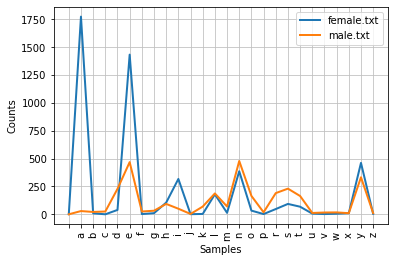

In [184]:
names = nltk.corpus.names
gender_names = [(fileid, name[-1])
       for fileid in names.fileids()
       for name in names.words(fileid)]
cfd = nltk.ConditionalFreqDist(gender_names)
cfd.plot()

## Ejercicios Capítulo 2


2. **Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?**

In [185]:
persuasion = nltk.corpus.gutenberg.words('austen-persuasion.txt')
vocab_size(persuasion)

El texto posee un tamaño de vocabulario de 98171 tokens y 6132 types y una diversidad de 16.0


3. **Use the Brown Corpus reader nltk.corpus.brown.words() or the Web Text Corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres**

In [186]:
firefox = nltk.corpus.webtext.words('firefox.txt')
ca01 = nltk.corpus.brown.words('ca01')

4. **Read in the texts of the State of the Union addresses,using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?**

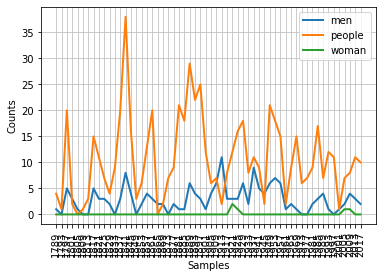

In [187]:
from nltk.corpus import inaugural
inaugural.fileids()

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['men', 'woman', 'people']
    if w.lower().startswith(target))

cfd.plot()

5. **Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use member_mer onyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms()**

In [188]:
from nltk.corpus import wordnet as wn

print("El merónimo parte de dog es", wn.synset('dog.n.01').part_meronyms())
print("El merónimo miembro de dog es", wn.synset('dog.n.01').member_meronyms())
print("El merónimo sustancia de dog es",wn.synset('dog.n.01').substance_meronyms())
print("El holónimo parte de dog es",wn.synset('dog.n.01').part_holonyms())
print("El holónimo miembro de dog es",wn.synset('dog.n.01').member_holonyms())
print("El holónimo sustancia de dog es",wn.synset('dog.n.01').substance_holonyms())

El merónimo parte de dog es [Synset('flag.n.07')]
El merónimo miembro de dog es []
El merónimo sustancia de dog es []
El holónimo parte de dog es []
El holónimo miembro de dog es [Synset('canis.n.01'), Synset('pack.n.06')]
El holónimo sustancia de dog es []


6. **Write a program to find all words that occur at least three times in the Brown Corpus**

In [189]:
bcorpus = nltk.corpus.brown.words() # selecciona todos los textos del corpora brown
counting = FreqDist(bcorpus) # obtiene la frecuencia de las palabras
counting = dict((k, v) for k, v # formate las variables del diccionario como k y v
                in counting.items() # identifica los elementos del dict
                if v > 3) # ingresa k si el valor v es mayor a 3

7. **Write a program to generate a table of lexical diversity scores (i.e., token/type ratios), as we saw in Table 1-1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?**

El humor tiene una menor diversidad léxica, con un puntaje de $4.3$. Supongo que es esperable, en tanto el humor se debería suscribir a campos específicos para generar su efecto.

In [190]:
def diversidad(text):
  return len(text)/len(set(text))

categoria_brown = nltk.corpus.brown.categories()
print("categorias","tokens", "types", "diversidad")
for categorias in categoria_brown:
  categoria_palabras = nltk.corpus.brown.words(categories = categorias)
  print(categorias, len(categoria_palabras), len(set(categoria_palabras)), round(diversidad(categoria_palabras), 1))

categorias tokens types diversidad
adventure 69342 8874 7.8
belles_lettres 173096 18421 9.4
editorial 61604 9890 6.2
fiction 68488 9302 7.4
government 70117 8181 8.6
hobbies 82345 11935 6.9
humor 21695 5017 4.3
learned 181888 16859 10.8
lore 110299 14503 7.6
mystery 57169 6982 8.2
news 100554 14394 7.0
religion 39399 6373 6.2
reviews 40704 8626 4.7
romance 70022 8452 8.3
science_fiction 14470 3233 4.5


8. Define a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males versus females (see Figure 2-7).

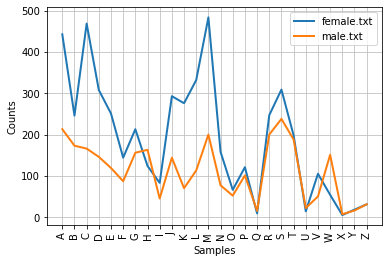

In [191]:
names = nltk.corpus.names
gender_names = [(fileid, name[0])
       for fileid in names.fileids()
       for name in names.words(fileid)]
cfd = nltk.ConditionalFreqDist(gender_names)
cfd.plot()

9. **Write a function that finds the 50 most frequently occurring words of a text that are not stopwords**

In [192]:
from nltk.corpus import stopwords
stop = nltk.corpus.stopwords.words('english')

def more_50_frequent(text):
  conteo = [w for w in text if w.lower() not in stop and w.isalpha()]
  conteo_final = FreqDist(conteo).most_common(50)
  return conteo_final

more_50_frequent(nltk.corpus.gutenberg.words('austen-persuasion.txt'))

[('Anne', 497),
 ('could', 444),
 ('would', 351),
 ('Captain', 297),
 ('Mrs', 291),
 ('Elliot', 288),
 ('Mr', 256),
 ('must', 228),
 ('one', 221),
 ('Wentworth', 218),
 ('much', 205),
 ('Lady', 191),
 ('good', 181),
 ('little', 175),
 ('said', 173),
 ('Charles', 166),
 ('might', 166),
 ('never', 153),
 ('time', 151),
 ('think', 149),
 ('Russell', 148),
 ('Sir', 144),
 ('Walter', 141),
 ('well', 141),
 ('Mary', 138),
 ('man', 133),
 ('nothing', 131),
 ('Musgrove', 130),
 ('know', 127),
 ('Miss', 123),
 ('see', 123),
 ('soon', 121),
 ('father', 117),
 ('great', 116),
 ('first', 112),
 ('two', 112),
 ('Louisa', 111),
 ('quite', 110),
 ('always', 109),
 ('though', 107),
 ('without', 106),
 ('Bath', 99),
 ('every', 96),
 ('made', 96),
 ('long', 95),
 ('say', 93),
 ('seemed', 93),
 ('thought', 90),
 ('Elizabeth', 89),
 ('last', 88)]

10. **Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.**

In [193]:
from nltk.corpus import stopwords
stop = nltk.corpus.stopwords.words('english')

def bigram_50_most(text):
  input = [t for t in text if t.lower() not in stop and t.isalpha()]
  bigram = nltk.bigrams(input)
  cfd = nltk.FreqDist(bigram).most_common(50) # obtiene distribucion condional de los bigramas
  return cfd

bigram_50_most(nltk.corpus.gutenberg.words('austen-persuasion.txt'))

[(('Captain', 'Wentworth'), 196),
 (('Mr', 'Elliot'), 174),
 (('Lady', 'Russell'), 147),
 (('Sir', 'Walter'), 131),
 (('Mrs', 'Clay'), 66),
 (('Mrs', 'Musgrove'), 66),
 (('Mrs', 'Smith'), 64),
 (('Captain', 'Benwick'), 56),
 (('Miss', 'Elliot'), 48),
 (('Mrs', 'Croft'), 41),
 (('Captain', 'Harville'), 37),
 (('Anne', 'could'), 35),
 (('great', 'deal'), 34),
 (('Charles', 'Hayter'), 33),
 (('Camden', 'Place'), 29),
 (('Mr', 'Shepherd'), 26),
 (('Lady', 'Dalrymple'), 25),
 (('Kellynch', 'Hall'), 24),
 (('Mrs', 'Harville'), 24),
 (('Anne', 'Elliot'), 23),
 (('Colonel', 'Wallis'), 23),
 (('young', 'man'), 22),
 (('Miss', 'Musgroves'), 22),
 (('Mr', 'Musgrove'), 21),
 (('Miss', 'Anne'), 19),
 (('said', 'Anne'), 18),
 (('Mr', 'Mrs'), 17),
 (('Walter', 'Elliot'), 16),
 (('father', 'sister'), 15),
 (('Louisa', 'Musgrove'), 15),
 (('Charles', 'Musgrove'), 14),
 (('Admiral', 'Croft'), 14),
 (('Great', 'House'), 13),
 (('father', 'mother'), 13),
 (('Lady', 'Elliot'), 12),
 (('Miss', 'Carteret'), 

11. **Write a program to create a table of word frequencies by genre, like the one given in Section 2.1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.**

In [194]:
categoria_brown = nltk.corpus.brown.categories()
from nltk.corpus import brown

entradas = ['show', 'indicate', 'tell', 'say']
cfd = nltk.ConditionalFreqDist( 
    (genre, word)
    for genre in nltk.corpus.brown.categories()
    for word in brown.words(categories=genre))

cfd.tabulate(conditions = nltk.corpus.brown.categories(), samples = entradas)

                    show indicate     tell      say 
      adventure       15        3       29       34 
 belles_lettres       30        8       22       87 
      editorial       17        3       10       23 
        fiction       10        0       32       36 
     government        8       10        3        9 
        hobbies       27        8        7        9 
          humor        5        0        9       18 
        learned       55       29       10       61 
           lore       19        9       20       30 
        mystery       13        3       37       46 
           news       31        3       14       23 
       religion        5        2        3       39 
        reviews       23        1        4       17 
        romance        9        0       37       60 
science_fiction        4        1        8        3 


12. **Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus**

In [195]:
def word_freq(section, word):
  seccion = nltk.corpus.brown.words(categories = section)
  if word in seccion:
    conteo = FreqDist(seccion)
    return print("La palabra", word, "tiene una frecuencia de ", conteo[word], "en la seccion", section)
  else:
    return print("La palabra", word, "no posee frecuencias en la seccion", section)

word_freq('adventure', 'dream')
word_freq('adventure', 'Morgan')

La palabra dream tiene una frecuencia de  8 en la seccion adventure
La palabra Morgan tiene una frecuencia de  28 en la seccion adventure


13. **Define a function hedge(text) that processes a text and produces a new version with the word 'like' between every third word.**



In [196]:
def hedge(text):
    # test = 'this is a test sentence to insert like after every third word'.split()
    ids = [index-1 for index in list(range(4,len(text)+1,4))]
    for id in ids:
        text.insert(id,'like') # insert es el método para insertar un string en una cadena de texto
    return text

test_text=hedge('this is a test sentence to insert a word after every third word'.split())
print(test_text)

['this', 'is', 'a', 'like', 'test', 'sentence', 'to', 'like', 'insert', 'a', 'word', 'like', 'after', 'every', 'third', 'word']


14. **Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf’s law? (Hint: it helps to use a logarithmic scale.) What is going on at the extreme ends of the plotted line?**

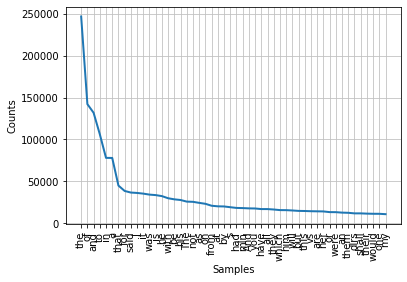

In [197]:
def zipf_law(text, n):
  texto = [w for w in text if w.isalpha()]
  conteo = FreqDist(texto)
  return conteo.plot(n)

all = nltk.corpus.gutenberg.words() + nltk.corpus.brown.words() + nltk.corpus.reuters.words()
zipf_law(all, 50)

# Procesar texto en bruto

The goal of this chapter is to answer the following questions:
1. How can we write programs to access text from local files and from the Web, in order to get hold of an unlimited range of language material?
2. How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier chapters?
3. How can we write programs to produce formatted output and save it in a file?

In [198]:
from __future__ import division
import nltk, re, pprint

## Expresiones regulares

Las expresiones regulares son metacaracteres que nos permiten realizar una abstracciones de los carácteres en un `string` y así seleccionar extractos de los textos.

Para esto, la librería `re` es utilizada para esto. 

In [199]:
import re

wordlist = nltk.corpus.words.words() # obtiene las palabras del corpus
[w for w in wordlist if re.search('^[g-o]+$', w)] # busca palabras que posean las letras entre g y o.

['g',
 'ghoom',
 'gig',
 'giggling',
 'gigolo',
 'gilim',
 'gill',
 'gilling',
 'gilo',
 'gim',
 'gin',
 'ging',
 'gingili',
 'gink',
 'ginkgo',
 'ginning',
 'gio',
 'glink',
 'glom',
 'glonoin',
 'gloom',
 'glooming',
 'gnomon',
 'go',
 'gog',
 'gogo',
 'goi',
 'going',
 'gol',
 'goli',
 'gon',
 'gong',
 'gonion',
 'goo',
 'googol',
 'gook',
 'gool',
 'goon',
 'h',
 'hi',
 'high',
 'hill',
 'him',
 'hin',
 'hing',
 'hinoki',
 'ho',
 'hog',
 'hoggin',
 'hogling',
 'hoi',
 'hoin',
 'holing',
 'holl',
 'hollin',
 'hollo',
 'hollong',
 'holm',
 'homo',
 'homologon',
 'hong',
 'honk',
 'hook',
 'hoon',
 'i',
 'igloo',
 'ihi',
 'ilk',
 'ill',
 'imi',
 'imino',
 'immi',
 'in',
 'ing',
 'ingoing',
 'inion',
 'ink',
 'inkling',
 'inlook',
 'inn',
 'inning',
 'io',
 'ion',
 'j',
 'jhool',
 'jig',
 'jing',
 'jingling',
 'jingo',
 'jinjili',
 'jink',
 'jinn',
 'jinni',
 'jo',
 'jog',
 'johnin',
 'join',
 'joining',
 'joll',
 'joom',
 'k',
 'kiki',
 'kil',
 'kilhig',
 'kilim',
 'kill',
 'killing',

Así, también podemos seleccionar grupos específicos, como vocales y consonantes. Por ejemplo, el segmento `[aeiou]` selecciona solo vocales, mientras que el uso de `^` dentro de `[]` (i.e. `[^aeiou]`) indica "buscar cualquier carácter que no esté en este grupo:

In [200]:
word = 'supercalifragilisticexpialidocious'

print("Esta palabra posee", len(re.findall(r'[aeiou]', word)), "vocales") # match vocales
print("Esta palabra posee", len(re.findall(r'[^aeiou]', word)), "consonantes") # match no vocales (^)
print("Esta palabra posee un total de ", len(word),"carácteres")

Esta palabra posee 16 vocales
Esta palabra posee 18 consonantes
Esta palabra posee un total de  34 carácteres


**Your Turn: In the W3C Date Time Format, dates are represented like this: 2009-12-31. Replace the ? in the following Python code with a regular expression, in order to convert the string '2009-12-31' to a list of integers [2009, 12, 31]:**

In [201]:
[int(n) for n in re.findall('[0-9]{2,}', '2009-12-31')] # .findall devuelve las coincidencias como valores

[2009, 12, 31]

In [202]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv # sea cv
       for w in rotokas_words  # para cada palabra en totokas
       for cv in re.findall(r'[ptksnv][aeiou]', w)] # encuentra la combinación de [1] y [2] para cada w
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


A partir de un conteo condicional, podemos crear además un index con todas las palabras que concuerden con la conbinación `'[ptksvr][aeiou]'` en `w`. 

In [203]:
cv_word_pairs = [(cv, w) # sea cv  y w
for w in rotokas_words # para cada w in rotokas
for cv in re.findall(r'[ptksvr][aeiou]', w)] # encuentra la combinación de [1] y [2] en w

cv_index = nltk.Index(cv_word_pairs) # indexa las palabras w según cv
cv_index['su'] # encuentra palabras que posean la sílaba su según su index

['kasuari']

**Your Turn: Consolidate your understanding of regular expression patterns and substitutions using nltk.re_show(p, s), which annotates the string s to show every place where pattern p was matched, and nltk.app.nemo(), which provides a graphical interface for exploring regular expressions. For more practice, try some of the exercises on regular expressions at the end of this chapter.**

In [204]:
who = "Consolidate your understanding of regular expression patterns and substitutions using nltk.re_show(p, s)"
nltk.re_show('[aeiou]+', who)

C{o}ns{o}l{i}d{a}t{e} y{ou}r {u}nd{e}rst{a}nd{i}ng {o}f r{e}g{u}l{a}r {e}xpr{e}ss{io}n p{a}tt{e}rns {a}nd s{u}bst{i}t{u}t{io}ns {u}s{i}ng nltk.r{e}_sh{o}w(p, s)


**Your Turn: Look for instances of the pattern as x as y to discover information about entities and their properties**

In [205]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r"<as> <\w*> <as> <\w*s>")

as coppery as Delawares; as well as injuries; as much as was; as well
as personalities; as much as glass; as importantly as his


## Stemmers

Si bien las raices pueden ser recuperadas y almacenadas a través de expresiones regulares que eliminen los afijos de una palabra, el paquete `nltk` posee un *stemmer* que puede hacer este trabajo. Con esta función, las palabras flexionadas o derivadas son reemplazadas por su lexema. Por ejemplo, en el texto `raw` siguiente, el item 'lying' se reemplaza por 'lie'. 

In [206]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from  
a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = nltk.word_tokenize(raw)
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
[porter.stem(t) for t in tokens]

['denni',
 ':',
 'listen',
 ',',
 'strang',
 'women',
 'lie',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandat',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcic',
 'aquat',
 'ceremoni',
 '.']

No obstante, dada irregularidad natural del lenguaje, los diferentes stemmer disponibles suelen realizar errores en diferentes aspectos. En este sentido, lo importante está en utilizar el stemmer adecuado para la tarea adecuada. Así, los stemmers son una buena opción cuando se busca soportar la búsqueda de formas alternativas de las palabras ingresadas.

## Lematización

Mientras los stemmers son bastante "brutos", la lematización se apoya en diccionarios predefinidos. Dado esto, el proceso es mucho más lento, pero útil cuando se busca consolidar el vocabulario de textos y validarlo por medio del diccionario.  

In [207]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

## Tokenización

La tokenización es el proceso de cortar cadenas de texto en unidades constitutivas identificables. Así, una cadena en bruto como `"este es un texto"` puede ser tokenizada en palabras en `'este', 'es', 'un, 'texto'`. La tokenización del rango de la palabra y la cláusula son las más comunes. 

En el caso de las palabras, el estándar es la tokenización a partir de espacios en blanco entre palabras `' '`. Si bien rápido y práctico, este método no identifica palabras compuestas por n-gramas como *proceso civilizatorio*, *estado de emergencia*, o *system of gobernment*, mucho más comunes en el lenguaje especializado. El código siguiente, realiza una tokenización con expresiones regulares identificando espacios en blanco `' '`, saltos de línea `\n` y tabulaciones `\t` en uno o más carácteres `+`.

In [208]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government."""

re.split(r'[ \t\n]+', raw) # r = considera los elementos interiores de '' literalmente

['DENNIS:',
 'Listen,',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government.']

Además de este método, el metacarácter `\w` identifica todos los elementos que **NO sean** una palabra (e.g. puntos, metacarácteres, etc.), mientras que en su forma mayúscula `\W` identifica solo palabras. **No obstante, parece que en este Google Colab ambos metacarácteres están invertidos. En todas partes dice que minúscula = palabra y mayúscula = no-palabra.**

In [209]:
# \w identificará las NO-palabras
re.split('\w+', raw)

['',
 ': ',
 ', ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.']

In [210]:
# \w identificará las palabras
re.split('\W+', raw)

['DENNIS',
 'Listen',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '']

A partir de expresiones regulares, podemos identificar estas palabras compuestas por n-gramas como *system of government* y *president of USA*. En la expresión regular `"(\w+\s+of\s\w+)"`, le indicamos al programa que encuentre una palabra `\w+` seguida de un espacio en blanco `\s` seguida de `of`. Además, al incluir el operador OR `|` dentro del agrupamiento `()` podemos lograr que este haga match no solo a los compuesto de n-gramas, sino también a los lexemas individuales. **Nota: el regex es sensible a los espacios en blanco entre metacaracteres**. 

In [211]:
other_text = "The system of goverment surely is not enough for citizen's problems. They need the president of USA appers."

re.findall(r"(\w+\s+of\s\w+|\w+)", other_text)

['The',
 'system of goverment',
 'surely',
 'is',
 'not',
 'enough',
 'for',
 'citizen',
 's',
 'problems',
 'They',
 'need',
 'the',
 'president of USA',
 'appers']

`nltk.regexp_tokenize` es otro tokenizador disponible en el paquete nltk, más tiempo-eficiente que el regex con `re.findall`. Así, es posible comparar los tokenizadores: "We can evaluate a tokenizer by comparing the resulting tokens with a `wordlist`, and then report any tokens that don’t appear in the wordlist, using `set(tokens).difference(wordlist)`. You’ll probably want to lowercase all the tokens first."

In [212]:
pattern = r"(\w+\s+of\s\w+|\w+)"
nltk.regexp_tokenize(other_text, pattern)

['The',
 'system of goverment',
 'surely',
 'is',
 'not',
 'enough',
 'for',
 'citizen',
 's',
 'problems',
 'They',
 'need',
 'the',
 'president of USA',
 'appers']

## Ejercicios Capítulo 3


1. **Define a string `s = 'colorless'`. Write a Python statement that changes this to “colourless” using only the slice and concatenation operations.**

In [213]:
s = "colorless"

s2 = s[:4] + "u" + s[4:]
s2

'colourless'

2. **We can use the slice notation to remove morphological endings on words. For example, 'dogs'[:-1] removes the last character of dogs, leaving dog. Use slice notation to remove the affixes from these words (we’ve inserted a hyphen to indicate the affix boundary, but omit this from your strings): dish-es, run-ning, nation- ality, un-do, pre-heat**

In [214]:
steam = ["dishes"[:-2], "running"[:3], "nationality"[:-5], "undo"[2:], "preheat"[3:]]
steam

['dish', 'run', 'nation', 'do', 'heat']

3. **We can specify a “step” size for the slice. The following returns every second character within the slice: monty[6:11:2]. It also works in the reverse direction: monty[10:5:-2]. Try these for yourself, and then experiment with different step values.**

In [215]:
monty = "monty python"
monty[10:5:-4]

'op'

4. **Describe the class of strings matched by the following regular expressions:**
1. **[a-zA-Z]+**: cualquier palabra = \w+

2. **[A-Z][a-z]***: todas las letras individualmente

3. **p[aeiou]{,2}t**: letra p seguida de menos de 2 vocales

4. **\d+(\.\d+)?**: numeros *e.g. 1.22222*

5. **([^aeiou][aeiou][^aeiou])***: estructura cvc

6. **\w+|[^\w\s]+**: una palabra PERO NO una letra seguida de espacio

5. **Write regular expressions to match the following classes of strings:**
1. A single determiner (assume that a, an, and the are the only determiners)
2. An arithmetic expression using integers, addition, and multiplication, such as 2*3+8

In [216]:
import re

determiner = "the house in an amazing house and a beautiful home"
aritmetics = "2*3+8"

re.findall(r"the|a[n]?[^a-z]", determiner) # listoko
re.findall("(\d+([+*-]?))+", aritmetics)  # listo

[('8', '')]

5. **Rewrite the following loop as a list comprehension:**

In [217]:
sent = ["the", "dog", "gave", "John", "the", "newspaper"]

# Programa original en un for loop
result = []
for word in sent:
  word_len = (word, len(word))
  result.append(word_len)

# Programa reescrito en una lista comprehensiva
result = [(word, len(word)) for word in sent]

result

[('the', 3),
 ('dog', 3),
 ('gave', 4),
 ('John', 4),
 ('the', 3),
 ('newspaper', 9)]

6. **Define a string raw containing a sentence of your own choosing. Now, split raw on some character other than space, such as 's'**

In [218]:
determiner = "the house in an amazing house and a beautiful home"

re.split("[a]", determiner)

['the house in ', 'n ', 'm', 'zing house ', 'nd ', ' be', 'utiful home']

7. **Write a for loop to print out the characters of a string, one per line.**

In [219]:
determiner = "the house in an amazing house and a beautiful home"

for c in determiner:
  t = re.findall(r'\w', c)
  print(t)

['t']
['h']
['e']
[]
['h']
['o']
['u']
['s']
['e']
[]
['i']
['n']
[]
['a']
['n']
[]
['a']
['m']
['a']
['z']
['i']
['n']
['g']
[]
['h']
['o']
['u']
['s']
['e']
[]
['a']
['n']
['d']
[]
['a']
[]
['b']
['e']
['a']
['u']
['t']
['i']
['f']
['u']
['l']
[]
['h']
['o']
['m']
['e']


8. **Create a variable words containing a list of words. Experiment with words.sort() and sorted(words). What is the difference?**

In [220]:
words = "the house in an amazing house and a beautiful home"
words = re.findall(r'\w+', words)

words.sort() # no devuelve nada
sorted(words) # devuelve en orden alfabético

['a',
 'amazing',
 'an',
 'and',
 'beautiful',
 'home',
 'house',
 'house',
 'in',
 'the']

9. **Read in some text from a corpus, tokenize it, and print the list of all wh-word types that occur. (wh-words in English are used in questions, relative clauses, and exclamations: who, which, what, and so on.) Print them in order. Are any words duplicated in this list, because of the presence of case distinctions or punctuation?**

In [221]:
emma = nltk.corpus.gutenberg.words("austen-emma.txt")

wh_words = [wh 
            for w in emma 
            for wh in re.findall(r'who|what|when|where|why|which|whom|whose', w)] # para cada palabra en emma.txt

cfd_wh = nltk.FreqDist(wh_words)
cfd_wh.tabulate()

which   who  what  when where   why 
  553   492   454   337   106    33 


10. **Are you able to write a regular expression to tokenize text in such a way that the word don’t is tokenized into do and n’t? Explain why this regular expression won’t work: «n't|\w+».**

In [222]:
dont = "don't call me now. It doesn't feel good"

#nltk.re_show(r"\w+|(n't)", dont)

patterns_list = [r"(n\'t)"]
pattern=re.compile('|'.join(patterns_list))

print([i for i in pattern.split(dont) if i])

['do', "n't", ' call me now. It does', "n't", ' feel good']


11. **Try to write code to convert text into hAck3r, using regular expressions and substitution, where e → 3, i → 1, o → 0, l → |, s → 5, . → 5w33t!, ate → 8. Normalize the text to lowercase before converting it. Add more substitutions of your own. Now try to map s to two different values: $ for word-initial s, and 5 for word- internal s.**

In [223]:
# Texto a convertir

texto_original = "the house is in an amazing house and a beautiful home for an ate and sun."

print(texto_original.replace('e', '3').
      replace('o', '0').
      replace('i', '1').
      replace('l', '|').
      replace('.', '5w33t!').
      replace('ate', '8').
      replace('s', '5')
      )

th3 h0u53 15 1n an amaz1ng h0u53 and a b3aut1fu| h0m3 f0r an at3 and 5un5w33t!


12. **Download some text from a language that has vowel harmony (e.g., Hungarian), extract the vowel sequences of words, and create a vowel bigram table.**

In [271]:
from nltk.corpus import udhr

raw_hungaro = udhr.raw('Hungarian_Magyar-Latin1')
solo_vocal = re.findall(r"[aeiouáéúőóüö ]", raw_hungaro)
palabras_vocales = ''.join(solo_vocal)
palabras_vocales_listado = re.findall(r"\w+", palabras_vocales)

cvs = [cv 
       for w in palabras_vocales_listado 
       for cv in re.findall(r'[aeiouáéúőóüö][aeiouáéúőóüö]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u   á   é   ó   ö   ú   ü 
a 104  12   9  33   4  55   0  12   0   0   0 
e  13 181  45  12   1  10  83   0   5   0  20 
i  28  73  23  11   0   6   8   0   1   0   0 
o  64   1  11  26   0  24   2   1   0   1   0 
u  14   1   0   1   1   3   0   2   0   0   0 
á  57   5  15  36   1  18   2   4   0   0   0 
é   2  81   5   0   0   3  16   6   0   1   7 
ó   3   0   0   1   1   3   1   2   0   0   0 
ö   1  11   6   1   0   0  11   0  12   0   3 
ú   0   0   0   2   0   4   0   1   0   0   0 
ü   0  14   1   0   0   0   6   0   4   0   0 


13. **Python’s random module includes a function choice() which randomly chooses an item from a sequence; e.g., choice("aehh ") will produce one of four possible characters, with the letter h being twice as frequent as the others. Write a generator expression that produces a sequence of 500 randomly chosen letters drawn from the string "aehh ", and put this expression inside a call to the ''.join() function, to concatenate them into one long string. You should get a result that looks like uncontrolled sneezing or maniacal laughter: he haha ee heheeh eha. Use split() and join() again to normalize the whitespace in this string.**

In [385]:
from random import choice

letras = ["a", "e", "h", "h", " "]

def risotada(letras):
  risa = ''.join(choice(letras) for x in range(500))
  print(risa)

risotada(letras)

haaeahhaeheheh hha aheae ahh aeeaaehhe hhhehehhehehh ea ahaeaah heeheh ehah  aaa  eh h e heha hheahehhea hhahh e aah a    hh hae  h hhaaae ahhe ahhhhh aahe  a  ae haahehha hhhhhh aa ehh a hh ahehh h h   h  e aaeh haeae ehaeeeehahhaheahhh haehhh  hhhehhh a   h ah  h hhhea hhhhah  aehhahhh ehhaahhhhhhaahhaahaaehehha aahhah ha  aahehahe ha eeehehehheheahaahah ahhehhhe e e hhe hh haahh haeae he haahee e aeah eahheee  hhehhhhehae ahaaehehaaaahhe hhhhheh hha ahee  ehaahh aeahhh hea    hhe ae aehaa haa


14. **Readability measures are used to score the reading difficulty of a text, for the purposes of selecting texts of appropriate difficulty for language learners. Let us define μw to be the average number of letters per word, and μs to be the average number of words per sentence, in a given text. The Automated Readability Index (ARI) of the text is defined to be: 4.71 μw + 0.5 μs - 21.43. Compute the ARI score for various sections of the Brown Corpus, including section f (popular lore) and j (learned). Make use of the fact that nltk.corpus.brown.words() produces a sequence of words, whereas nltk.corpus.brown.sents() produces a sequence of sentences.**

In [565]:
palabras = ["aoa", "antonio", "a"]
texto_ejemplo = "este es un texto. Tiene oraciones y todas no se que cosa. No sé que más."
tokenizado_ejemplo = re.findall(r"\w+", texto_ejemplo)

def average_letters_words(raw_text):
  tokenize = re.findall(r"\w+", raw_text)
  len_words = [len(word) for word in tokenize]
  average_word_len = sum(len_words)/len(len_words)
  return(int(round(average_word_len)))

def average_words_sentences(raw_text):
  create_sentences = raw_text.split(".")
  tokenize = [re.findall(r"\w+", t) for t in create_sentences] 
  len_sentence = [len(sentence) for sentence in tokenize]
  average_sentence_len = sum(len_sentence[:-1])/len(len_sentence[:-1])
  return(int(round(average_sentence_len)))

def automated_readability_index(raw_text):
  letters_words = average_letters_words(raw_text) * 4.71
  words_sentences = average_words_sentences(raw_text) * 0.5
  score = round(letters_words + words_sentences - 21.43)
  return score

print("género ARI")
print("Lore:", automated_readability_index(' '.join(nltk.corpus.brown.words(categories='lore'))))
print("Learned:", automated_readability_index(' '.join(nltk.corpus.brown.words(categories='news'))))
print("Adventure:", automated_readability_index(' '.join(nltk.corpus.brown.words(categories='adventure'))))
print("Science fiction:", automated_readability_index(' '.join(nltk.corpus.brown.words(categories='science_fiction'))))
print("Humor:", automated_readability_index(' '.join(nltk.corpus.brown.words(categories='humor'))))
print("Hobbies", automated_readability_index(' '.join(nltk.corpus.brown.words(categories='hobbies'))))
print("Belles lettres", automated_readability_index(' '.join(nltk.corpus.brown.words(categories='lore'))))

género ARI
Lore: 13
Learned: 10
Adventure: 4
Science fiction: 5
Humor: 7
Hobbies 12
Belles lettres 13
